# Importing Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the Data

In [68]:
df=pd.read_csv('Iris.csv')

In [69]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [71]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [72]:
df=df.drop('Id',axis=1)

# Visualisations

In [73]:
df.Species=df.Species.map({'Iris-setosa':1,'Iris-virginica':2,'Iris-versicolor':3})

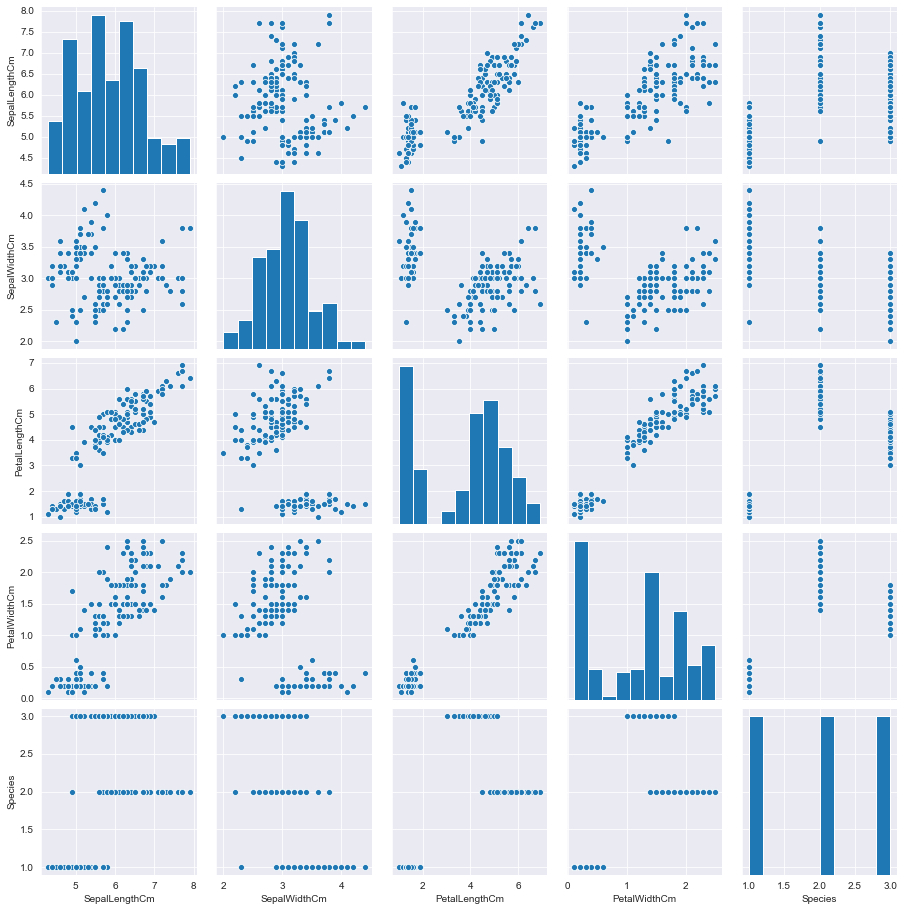

In [86]:
sns.pairplot(df)

Text(0.5, 1.0, 'Scatterplot SepalWidthCm vs SepalLengthCm')

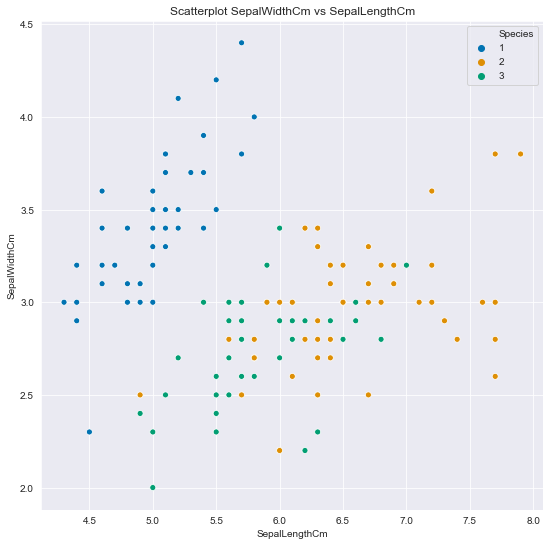

In [85]:
plt.figure(figsize=(9,9))
sns.set_style('darkgrid')
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species',palette='colorblind')
plt.title('Scatterplot SepalWidthCm vs SepalLengthCm')

Text(0.5, 1.0, 'Scatterplot PetalWidthCm vs PetalLengthCm')

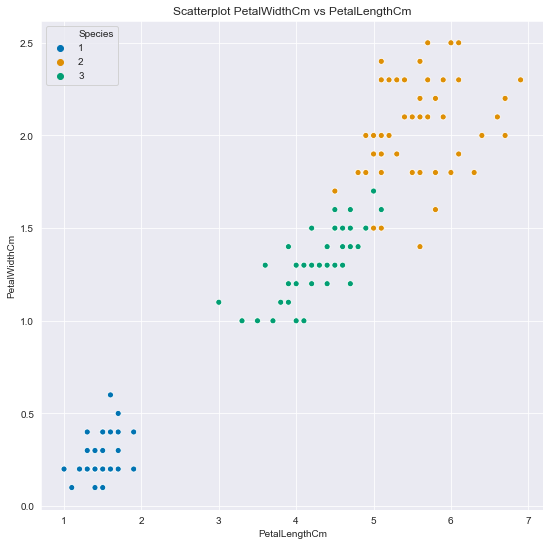

In [87]:
plt.figure(figsize=(9,9))
sns.set_style('darkgrid')
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species',palette='colorblind')
plt.title('Scatterplot PetalWidthCm vs PetalLengthCm')

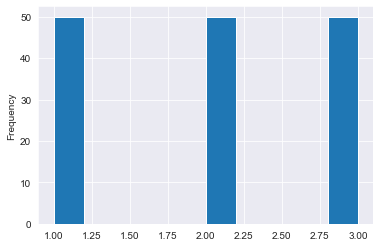

In [100]:
df.Species.plot(kind='hist')

In [8]:
target=df.Species
df=df.drop('Species',axis=1)


# Training the Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

# Random Forest

In [27]:
steps=[('rfc',RandomForestClassifier())]

In [28]:
pipeline=Pipeline(steps)

In [29]:
parameter={'rfc__max_depth':np.arange(5,10)}

In [30]:
cv=GridSearchCV(pipeline,parameter,cv=5)

In [31]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                              

In [32]:
cv_pred=cv.predict(X_test)

In [33]:
cv.best_params_

{'rfc__max_depth': 5}

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
cv.best_score_

0.95

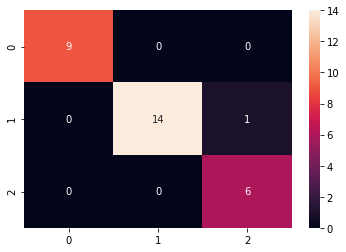

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,cv_pred),annot=True)

In [37]:
print(classification_report(Y_test,cv_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.93      0.97        15
           3       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



# Gradient Boosted Trees

In [38]:
steps=[('gb',GradientBoostingClassifier())]

In [39]:
pipeline=Pipeline(steps)

In [40]:
parameter={'gb__max_depth':np.arange(3,10)}

In [41]:
cv=GridSearchCV(pipeline,parameter,cv=5)

In [42]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('gb',
                                        GradientBoostingClassifier(ccp_alpha=0.0,
                                                                   criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
          

In [43]:
cv_pred=cv.predict(X_test)

In [44]:
cv.best_params_

{'gb__max_depth': 3}

In [45]:
cv.best_score_

0.95

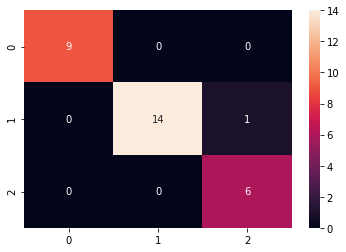

In [46]:
sns.heatmap(confusion_matrix(Y_test,cv_pred),annot=True)

In [47]:
print(classification_report(Y_test,cv_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.93      0.97        15
           3       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



# Decision Trees

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
steps=[('dt',DecisionTreeClassifier())]

In [50]:
parameter={'dt__max_depth':np.arange(2,10)}

In [51]:
pipeline=Pipeline(steps)

In [52]:
cv=GridSearchCV(pipeline,parameter,cv=5)

In [53]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('dt',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                          

In [54]:
cv.best_params_

{'dt__max_depth': 3}

In [55]:
cv_pred=cv.predict(X_test)

In [56]:
print(classification_report(Y_test,cv_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.93      0.97        15
           3       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [57]:
cv.best_score_

0.9583333333333334

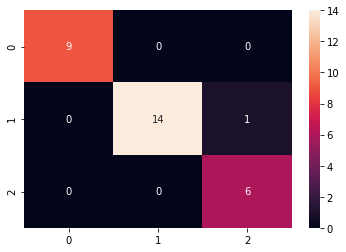

In [59]:
sns.heatmap(confusion_matrix(Y_test,cv_pred),annot=True)